<a href="https://colab.research.google.com/github/Kavyapersis/PRODIGY_ML_03/blob/main/PRODIGY_ML__Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory("/content/drive/MyDrive/test_set",target_size=(64, 64),batch_size=32,class_mode="binary")

Found 2033 images belonging to 1 classes.


In [ ]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/drive/MyDrive/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 1291 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

# **Step 1 - Convolution**
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(64, 64, 3) for 64x64 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

Arguments Used:

filters: Integer, the dimensionality of the output space.
padding: one of "valid" or "same". "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
activation: Activation function to use. If you don't specify anything, no activation is applied.
strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# **Step 2 - Pooling**
## Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Adding a second convolutional layer**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# **Step 3 - Flattening**
Flattens the input. Does not affect the batch size.

Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

In [ ]:
cnn.add(tf.keras.layers.Flatten())


# **Step 4 - Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# **Step 5 - Output Layer**

In [ ]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

Printing out the summary of the Layers

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# **Training the CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
64/64 [==============================] - 42s 669ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/5
64/64 [==============================] - 25s 388ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/5
64/64 [==============================] - 25s 388ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/5
64/64 [==============================] - 27s 422ms/step - loss: 9.9035e-04 - accuracy: 1.0000 - val_loss: 8.2120e-04 - val_accuracy: 1.0000
Epoch 5/5
64/64 [==============================] - 28s 437ms/step - loss: 6.9571e-04 - accuracy: 1.0000 - val_loss: 5.8255e-04 - val_accuracy: 1.0000


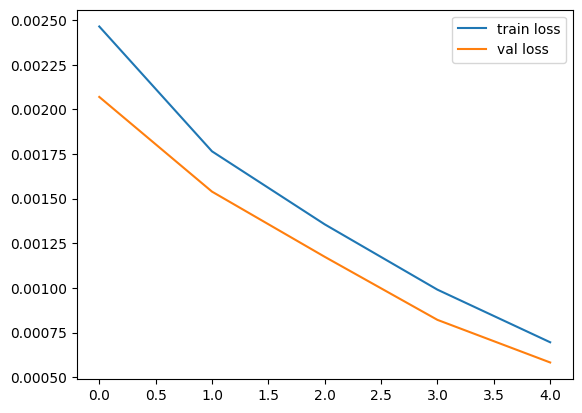

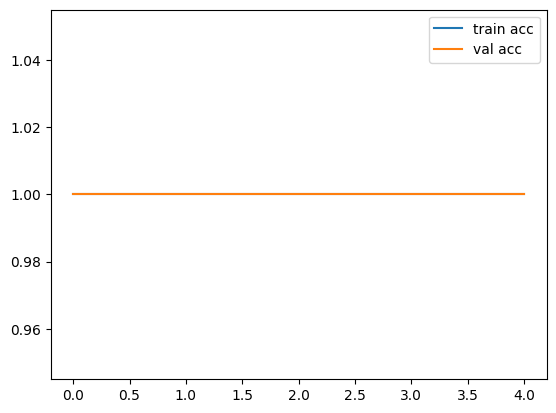

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

## **Training the CNN on the Training set and evaluating it on the Test set**

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

Taking the sample image converting the image to an array and predicting the result

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/training_set/training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 178ms/step


In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
